# Day 3 - CNNs ##
### Objetive: Exercise on CNN for Arabic Text Classification ###
### Dataset: Labeled Handwritten Arabic Words ###
### Please fill in all sections that start with "# Task" , sections that start with "# Step" are  pre-implemented #######

#### Section 1 - Dependencies & Libraries

In [ ]:
# Step 1.1. - Install required libraries
!pip3 install numpy swtloc matplotlib deskew opencv-python opencv-contrib-python tensorflow keras scikit-learn

# Step 1.2. - Restart Kernel Manually
# Toolbar -> Kernel -> Restart & Clear Output -> Restart & Clear All Outputs

In [2]:
# Step 1.3. - Import required libraries
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D,InputLayer,Dropout,BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt, numpy as np, glob, cv2, pandas as pd

#### Section 2 - Read Dataset

In [3]:
# Step 2.1. Load Images and Label Files into Pandas DataFrame
dataset_path = "Labeled_Handwritten_Arabic_Words/"
id_from_path = lambda x : x.split("\\")[1].split(".")[0]
images = [{"id": id_from_path(path), "img": cv2.resize(cv2.imread(path), (128, 64), interpolation=cv2.INTER_LINEAR)} for path in glob.glob(f"{dataset_path}/images/*.jpg")]
labels = [{"id": id_from_path(path), "label": open(path, encoding="utf8").read().strip()} for path in glob.glob(f"{dataset_path}/labels/*.txt")]
df = pd.merge(pd.DataFrame(images), pd.DataFrame(labels), on='id')

#### Section 3 - Label Encoding & & Prepare Train/Test Split

In [4]:
# Task 3.1. - Encoding Classes; one-hot-encoding
encoder = LabelEncoder().fit(df['label'])
classes = encoder.classes_
categorical_labels = pd.DataFrame(to_categorical(encoder.transform(df['label'])), columns=classes)
df = pd.concat([df, categorical_labels], axis=1)

# Task 3.2. Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(df['img'], df[classes], test_size=0.33, random_state=42)

#### Section 4 - Build the CNN Model

In [5]:
# Task 4.1. - Extract the image dimension information
img_rows, img_cols, no_channels = X_train.iloc[0].shape

# Task 4.2. - Initialize the sequential model and add an Input Layer that matches the image dimensions
model = Sequential()
model.add(InputLayer(input_shape=[img_rows, img_cols, no_channels]))

# Task 4.3. - Define a function that adds N convolution layers (conv+max pool) to the defined sequential model 
# The first layer starts with 15 filters (depth) then incrases by X with every extra layer.

# N: Number of convolution layers to add 
# K: Kernel size for convolution layers
# P: Pooling window size for the pooling layers
# S: Strides for convolution and pooling layers
# X: Number of filters to add with every new layer

# Note: Use padding="same" and activation="relu" in the convolution layers
def add_conv_layers(nn_model, N, K, P, S, X):
    number_of_filters = 15
    for i in range(N):
        nn_model.add(Conv2D(filters=number_of_filters, kernel_size=K, strides=S, padding="same", activation='relu'))
        nn_model.add(MaxPool2D(pool_size=P, strides=S))
        number_of_filters += X

# Task 4.4. - Call the defined function from Task 4.3 ; with N=3, K=3, P=2, S=2 and X=10
add_conv_layers(model, N=3, K=3, P=2, S=2, X=10)

# Task 4.5. - Define a function that adds a flattening layer followed by M fully connected layers and a dropout layer after each, 
# and finally a dense layer for the output classification

# M: Number of fully connected (dense) layers
# N: Number of neurons in each fully connected (dense) layer 
# prob: Dropout rate for dropout layer 
# n_classes: Number of output classes 

# Note: Use activation="relu" in the dense layers except for the last layer where you should use activation='softmax' 
def add_top_layers(nn_model, M, N, prob, n_classes):
    nn_model.add(Flatten())
    for i in range(M):
        nn_model.add(Dense(units=N, activation='relu'))
        nn_model.add(Dropout(prob))

    nn_model.add(Dense(units=n_classes, activation='softmax'))
    
# Task 4.6. - Call the defined function from Task 4.5 ; with M=2, N=256, Prob=0.2 and n_classes=5
add_top_layers(model, M=2, N=256, prob=0.2, n_classes=len(y_train.iloc[0]))

#### Section 5 - Compile & Train the CNN

In [6]:
# Task 5.1. -  Compile the model using Adam optimizer, categorical crossentropy loss function, and accuracy for the metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Task 5.2. - Fit to training images and labels by setting the epochs to 5 and validation_split to 10%
model.fit(np.stack([i.tolist() for i in X_train]), y_train, epochs=20, validation_split=0.1)

Epoch 1/20
98/98 [==============================] - 2s 13ms/step - loss: 6.1084 - accuracy: 0.0604 - val_loss: 4.7134 - val_accuracy: 0.1040
Epoch 2/20
98/98 [==============================] - 1s 12ms/step - loss: 4.5900 - accuracy: 0.1070 - val_loss: 4.3994 - val_accuracy: 0.1329
Epoch 3/20
98/98 [==============================] - 1s 11ms/step - loss: 4.2248 - accuracy: 0.1559 - val_loss: 4.2525 - val_accuracy: 0.1618
Epoch 4/20
98/98 [==============================] - 1s 11ms/step - loss: 3.9645 - accuracy: 0.1745 - val_loss: 4.1626 - val_accuracy: 0.1705
Epoch 5/20
98/98 [==============================] - 1s 12ms/step - loss: 3.6740 - accuracy: 0.2044 - val_loss: 4.1082 - val_accuracy: 0.1821
Epoch 6/20
98/98 [==============================] - 1s 12ms/step - loss: 3.4320 - accuracy: 0.2440 - val_loss: 4.1025 - val_accuracy: 0.1763
Epoch 7/20
98/98 [==============================] - 1s 12ms/step - loss: 3.1723 - accuracy: 0.2790 - val_loss: 3.9955 - val_accuracy: 0.2023
Epoch 8/20
98

#### Section 6 - Predict & Visualize Predictions Sample

54/54 [==============================] - 0s 5ms/step


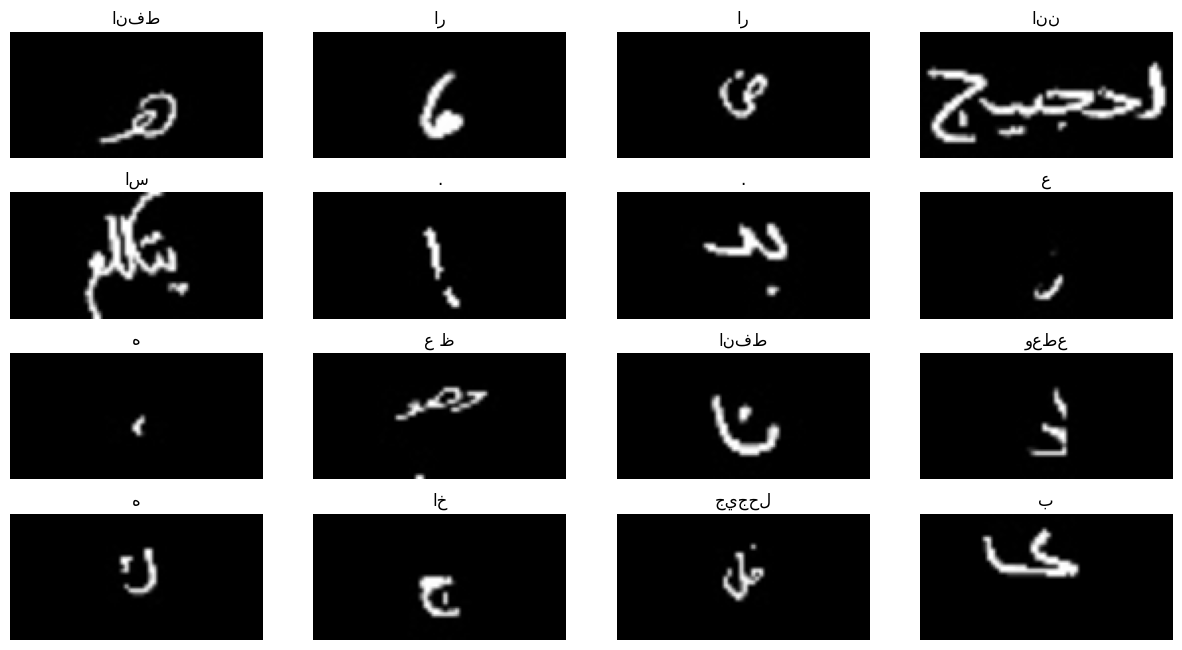

In [7]:
# Task 6.1. - Predict for the testing set
y_pred = model.predict(np.stack([i.tolist() for i in X_test]))

# Task 6.2 -  Visualize Predictions
_, ax = plt.subplots(4, 4, figsize=(15, 8))
for i, pred in enumerate(y_pred[:16]):
    img = X_train.iloc[i]
    label = classes[pred.argmax()]
    ax[i // 4, i % 4].imshow(img)
    ax[i // 4, i % 4].set_title(label[::-1])
    ax[i // 4, i % 4].axis("off")

plt.show()